# Model Validation

- Process of accessing how well ML model perform

## Cross Validation

- Utilizing all portion of data for training & validation

**4 fold validation**
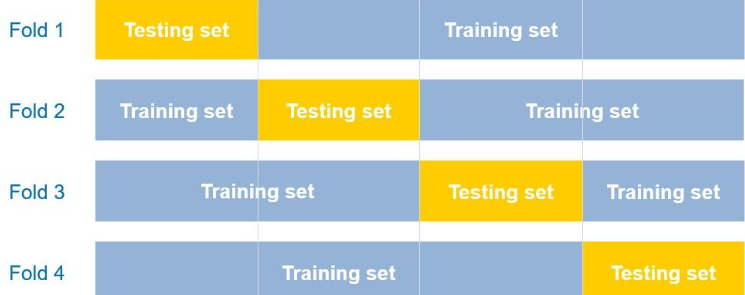

### 1. Creating Dataset

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')


# Extract features matrix and target array
X_iris = iris.drop('species',axis=1)
y_iris = iris['species']


# Choose a model class
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB() 


# split the data with 50% in each set 
from sklearn.model_selection import train_test_split

X1, X2, y1, y2 = train_test_split(X_iris,y_iris,
                                                random_state=0, train_size=0.5)

### 2.  Two fold cross validation


In [2]:
from sklearn.metrics import accuracy_score

y2_model = model.fit(X1,y1).predict(X2) 
y1_model = model.fit(X2, y2).predict(X1) 

accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.9733333333333334, 0.9466666666666667)

### 3. Five fold cross validation

In [6]:
# 5 fold cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_iris, y_iris, cv=5)

array([0.93333333, 0.96666667, 0.93333333, 0.93333333, 1.        ])

#  Bias - Variance tradeoff
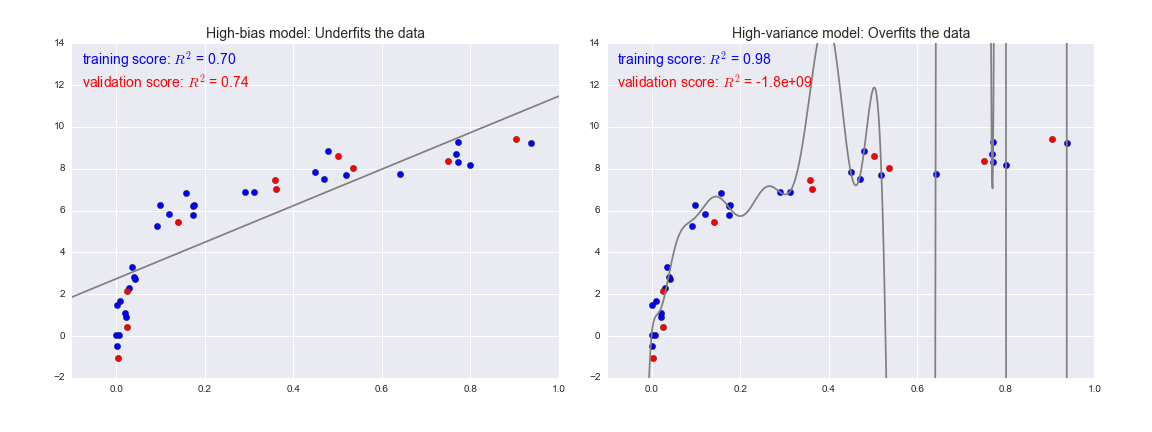

# Validation Curve
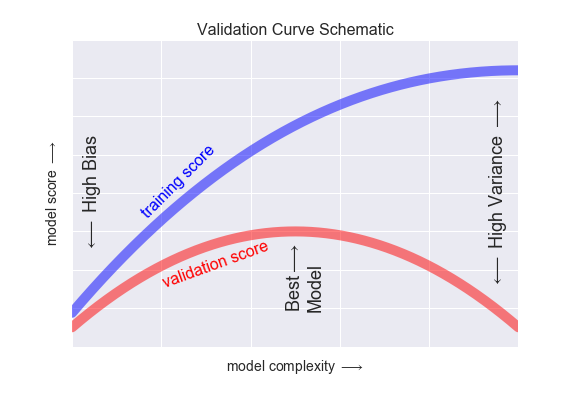


# Learning curve
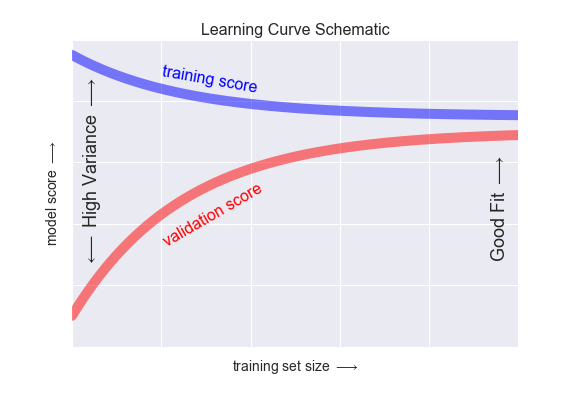

# Feature Engineering
- Improving model by optmizing & changing input

## Categorical Features
- **One Hot Encoding** : Creating extra columns indicating pre/absence of category with 1 or 0


### One Hot Vector

In [3]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]


# One Hot Encoding
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)


vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [7]:
vec.get_feature_names_out()

array(['neighborhood=Fremont', 'neighborhood=Queen Anne',
       'neighborhood=Wallingford', 'price', 'rooms'], dtype=object)

### Sparse Matrix (compressed)

In [8]:
vec = DictVectorizer(sparse=True, dtype=int) 
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

## Text Features
- converted using word counts

In [17]:
sample = ['problem of evil', 'evil queen', 'horizon problem']

from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

evil  horizon  of  problem  queen
0     1        0   1        1      0
1     1        0   0        0      1
2     0        1   0        1      0

## TF-IDF
- Weight word counts by frequency 

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

evil   horizon        of   problem     queen
0  0.517856  0.000000  0.680919  0.517856  0.000000
1  0.605349  0.000000  0.000000  0.000000  0.795961
2  0.000000  0.795961  0.000000  0.605349  0.000000

## Image Feature
- pixel values used

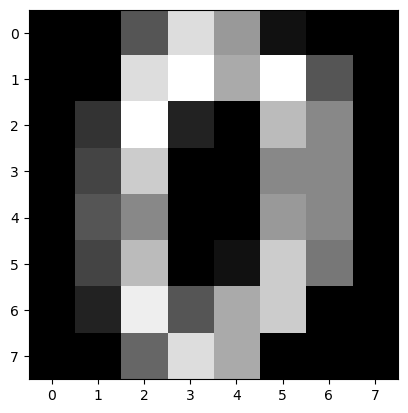

In [22]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape # 1797 8x8 images
digits.images[0] # One 8x8 image
digits.target[0] # Label data = black pixel


import matplotlib.pyplot as plt 
%matplotlib inline
plt.imshow(digits.images[0], cmap='gray')

## Derived Features
- Mathematically derived
- Increased flexibility

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


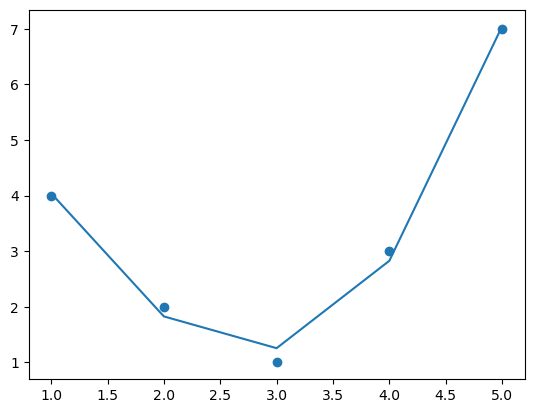

In [23]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
import numpy as np

x = np.array([1, 2, 3, 4, 5]) 
X = x[:,np.newaxis]  # feature
y = np.array([4, 2, 1, 3, 7]) # label


poly = PolynomialFeatures(degree=3, include_bias=False) # Column up to  3 degree added for flexibility
X2 = poly.fit_transform(X) 
print(X2)

model = LinearRegression().fit(X2, y)
yfit =  model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);

## Imputation of Missing Data
- Replace missing data with something

In [11]:
import numpy as np
X = np.array([[ np.nan, 0,3],
[3, 7, 9],
[3, 5, 2],
[4, np.nan, 6],
[8, 8, 1 ]])
y = np.array([14, 16, -1, 8, -5])


from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy='mean') 
X2 = imputer.fit_transform(X) 
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

## Feature Pipelines

- Unproccessed dataset ---process & ML--> Prediction

In [ ]:
from sklearn.pipeline import make_pipeline


model = make_pipeline (SimpleImputer (strategy='mean'), 
                       PolynomialFeatures (degree=2), 
                       LinearRegression())

model.fit(X, y) # X with missing values, from above 
print(y)
print(model.predict(X))